Link dataset : https://www.kaggle.com/datasets/jehanbhathena/weather-dataset

Import library

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Split dataset menjadi train, val dan test

In [38]:
train_paths = []
y_train_paths = []
x_val_paths = []
y_val_paths = []
x_test_paths = []
y_test_paths = []

all_paths = []
all_labels = []
data_dir = 'C:/Users/dheap/OneDrive/Dokumen/Kuliah/Kecerdasan Buatan/Posttest_KB_7/dataset/'
for label in os.listdir(data_dir):
    for image in os.listdir(data_dir+label):
        all_paths.append(data_dir+label+'/'+image)
        all_labels.append(label)
all_paths, all_labels = shuffle(all_paths, all_labels)

x_train_paths = all_paths[:200]
y_train = all_labels[:200]
x_val_paths = all_paths[:200]
y_val = all_labels[:200]
x_test_paths = all_paths[200:]
y_test = all_labels[200:]

Membuat objek ImageDataGenerator dengan beberapa konfigurasi augmentasi

In [39]:
IMG_PATH = 'dataset'

img_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.1,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Melakukan augmentasi dengan memuat data train, val, dan test

In [40]:
train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

validation_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

test_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
)

Found 6180 images belonging to 11 classes.
Found 682 images belonging to 11 classes.
Found 6862 images belonging to 11 classes.


Buat Model Sequential dengan Convolutional Layer

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',
    input_shape=[150,150,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

Compile model yang telah dibuat

In [42]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',
metrics=['accuracy'])

Membuat class callback

In [43]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy') > 0.80):
            self.model.stop_training = True

Melatih model

In [44]:
call = MyCallback()
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
194/194 [==============================] - 1219s 6s/step - loss: 2.1757 - accuracy: 0.2469 - val_loss: 1.8645 - val_accuracy: 0.3739
Epoch 2/10
194/194 [==============================] - 2423s 13s/step - loss: 1.7752 - accuracy: 0.4087 - val_loss: 1.6339 - val_accuracy: 0.4560
Epoch 3/10
194/194 [==============================] - 2333s 12s/step - loss: 1.5776 - accuracy: 0.4765 - val_loss: 1.4907 - val_accuracy: 0.5161
Epoch 4/10
194/194 [==============================] - 762s 4s/step - loss: 1.4489 - accuracy: 0.5159 - val_loss: 1.4081 - val_accuracy: 0.5499
Epoch 5/10
194/194 [==============================] - 758s 4s/step - loss: 1.3472 - accuracy: 0.5492 - val_loss: 1.4099 - val_accuracy: 0.5337
Epoch 6/10
194/194 [==============================] - 949s 5s/step - loss: 1.3197 - accuracy: 0.5620 - val_loss: 1.2211 - val_accuracy: 0.6232
Epoch 7/10
194/194 [==============================] - 1199s 6s/step - loss: 1.2323 - accuracy: 0.5883 - val_loss: 1.1937 - val_accuracy: 

Evaluasi model terhadap data test

In [45]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

215/215 [==============================] - 362s 2s/step - loss: 1.1466 - accuracy: 0.6029
Test loss: 1.146559476852417
Test accuracy: 0.6028854846954346


Grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

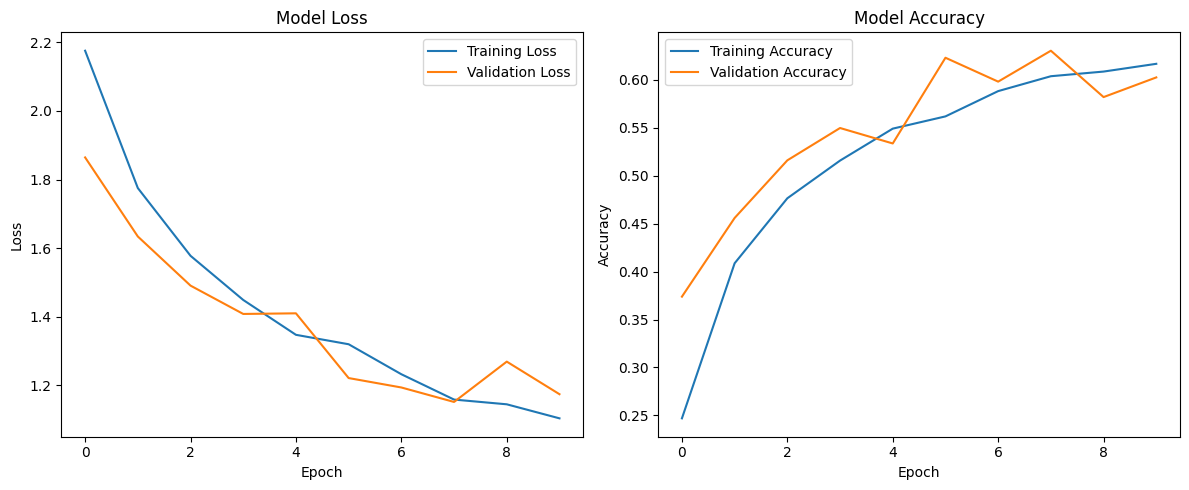

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()